# D212 - Data Mining II
### OFM3 Task 1: Clustering Technique
#### Data Mining II — D212
#### PRFA — OFM3
> André Davis
> StudentID: 010630641
> MSDA
>
> Competencies
> 4030.06.4 : Clustering Techniques
> The graduate applies clustering techniques to accurately predict outcomes of interest.

#### Table of Contents
<ul>
    <li><a href="#research-question">A1: Research Question</a></li>
    <li><a href="#objectives">A2: Objectives and Goals of Analysis</a></li>
    <li><a href="#explination-of-clustering">B1: Explanation of Clustering Technique</a></li>
    <li><a href="#assumptions">B2: Assumptions of Clustering Technique</a></li>
    <li><a href="#benefits-of-tool">B3: Benefits of Chosen Tools</a></li>
    <li><a href="#preparation-goals">C1: Data Preparation Goals and Necessary Manipulation</a></li>
    <li><a href="#variable-selection">C2: Variable Selection & Identification</a></li>
    <li><a href="#data-preparation">C3: Preparation of Data</a></li>
    <li><a href="#copy-of-dataset">C4: Copy of Prepared Data Set</a></li>
    <li><a href="#analysis-description">D1: Analysis Description</a></li>
    <li><a href="#classification-analaysis-code">D2: Classification Analysis Code</a></li>
    <li><a href="#model-accuracy">E1: Accuracy of Clustering Model</a></li>
    <li><a href="#model-results">E2: Model Results</a></li>
    <li><a href="#model-limitations">E3: Model Limitations</a></li>
    <li><a href="#recommended-action">E4: Recommended Action</a></li>
    <li><a href="#panopto-recording">F: Panopto Recording</a></li>
    <li><a href="#code-reference">G: Code References</a></li>
    <li><a href="#source-reference">H: Source References</a></li>
</ul>

<a id="research-question"></a>
# A1: Research Question

During the exploration of the Data Analytics life-cycle and the presentation of our findings to the Executive and support team, the focus of the [`WGU Medical Data`](https://access.wgu.edu/ASP3/aap/content/d8fj4l3d9s94jfu43kf9.zip) has been primarily on the concrete data and inquiries regarding re-admissions. In the context of WGU MSDA-D211, when sharing the findings of the data analytics teams, we initiated the creation of visual maps to represent patient perception based on geographical location.

Upon recognizing the potential relationship between patient perception and re-admissions, the executive team assigned us the task of analyzing the survey-specific data. In section `C3: Preparation of Data`, we verified the distribution of the survey questions and observed that they followed a very similiar distributions which may be hiding meaningful information. In order to uncover any additional meaningful insights, we will utilize hierarchical clustering to determine if there is indeed any additional significance to be derived.

**Research Question:**
> Using hierarchical clustering, are we able to gain additional significant insights into the survey data found within the WGU Medical Dataset?

This conforms to the first scenerio of the PA Task 1:

> Scenario 1
>
> One of the most critical factors in customer relationship management that directly affects a company’s long-term profitability is understanding its customers. When a company can better understand its customer characteristics, it is better able to target products and marketing campaigns for customers, resulting in better profits for the company in the long term.
>
> You are an analyst for a telecommunications company that wants to better understand the characteristics of its customers. You have been asked to use principal component analysis (PCA) to analyze customer data to identify the principal variables of your customers, ultimately allowing better business and strategic decision-making.


<a id="objectives"></a>
# A2: Objectives and Goals of Analysis

The objective of conducting Hierarchical Clustering Analysis on the survey section of the [`WGU Medical Dataset`](https://access.wgu.edu/ASP3/aap/content/d8fj4l3d9s94jfu43kf9.zip) is to uncover potentially significant insights hidden within the similarly distributed data. By clustering the data, we aim to identify specific areas of focus that can contribute to improving patient perception and reducing WGU Hospital Readmission rates in ways that may not be immediately apparent. Fundamentally, our goal is to examine the survey data and identify groups of patients who could potentially receive better service, while simultaneously reducing readmission rates to meet third-party [`HRRP`](https://www.cms.gov/medicare/medicare-fee-for-service-payment/acuteinpatientpps/readmissions-reduction-program) requirements. This approach has the potential to generate cost benefits for the hospital, patients, and the broader healthcare system as a whole.

<a id="explination-of-clustering"></a>
# B1: Explanation of Clustering Technique

"Hierarchical clustering allows the user to visualize the effect of specifying different numbers of clusters."(Bruce et al., 2020) . It creates a hierarchical structure of clusters by successively merging or splitting clusters. This technique helps to reveal underlying patterns and relationships within a dataset, allowing us to identify distinct groups or clusters that share common characteristics. The resulting hierarchy can be visualized using a dendrogram, which provides a visual representation of the clustering process. Hierarchical clustering is a valuable tool for exploratory data analysis and can assist in making informed decisions and gaining insights from complex datasets.

Dendrogram:
> "Hierarchical clustering lends itself to a natural graphical display as a tree,..." (pg. 306 - Bruce et al., 2020).

### Hierarchical Clustering Example:
![Hierarchical Clustering Example](./hierarchical-clustering-example-datacamp.png)
*Image Citation:* (Keita, 2023)

##### How hierarchical clustering will be performed:
 1. The survey data of all the WGU Medical Dataset patients will be stored in a [`Pandas DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html?highlight=dataframe#pandas.DataFrame) for processing.
 2. The [`SciPy`](https://scipy.org/) library provides a function called [`linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) that allows us to take the dataframe and produce a matrix of data that represents the hierarchical tree data.
 3. Graphically displaying the hierarchical tree data for human consumption with a [`Dendrogram`](https://en.wikipedia.org/wiki/Dendrogram) diagram with the [`SciPy dendrogram function`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram). This will provide an easy-to-understand visualization of the clusters and their distance from one another.
 4. Finally, we'll add labels to the clusters with [`fcluster`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html#scipy.cluster.hierarchy.fcluster)
 5. Use the final labeled Dendrogram to analyze for additional patterns.

<a id="assumptions"></a>
# B2: Assumption of Clustering Technique
##### Note: "Summarize one assumption of the clustering technique."

The performance assessment calls for a choice between `k-means clustering` and `hierarchical clustering`. I have chosen `hierarchical clustering` for my technique and will specifically be speaking of the assumptions of this technique.

Assumption of Standard Scale:

Hierarchical clustering groups similar observations together based on their distances from each other. The method assumes that the variables used for clustering are on a consistent scale. If the variables have different ranges, the ones with larger ranges could dominate the clustering process. Pre-processing tools such as [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) help mitigate this potential domination by bring all the values into the same scale without distorting them. In the case of the WGU Medical Dataset, the patient survey data is already in a scale of 1-8 so does not need this standardization process to occur.


<a id="benefits-of-tool"></a>
# B3: Benefits of Chosen Tools
 * Language:
   * [`Python 3`](https://www.python.org/)
      * Python is an easy to learn and read programming language which can bring the power of programming easily to statisticians or other scientific fields.
 * Environment
   * [`Jupyter Notebook`](https://jupyter.org/)
      * Jupyter Notebook is a great environment for experimentation and pairing with documentation that experimentation.
 * Graphical
   * [`Matplotlib`](https://matplotlib.org/stable/index.html)
      * Matplotlib is a Python library that provides easy to use capabilities for creating high-quality visualizations and plots.
   * [`Seaborn`](https://seaborn.pydata.org/)
      * Seaborn is built as an extension to Matplotlib to make higher qualify visualization easier and make it easier to work with Pandas DataFrames.
 * Data Manipulation
   * [`Pandas`](https://pandas.pydata.org/docs/)
      * Pandas provide an ability to hold data in a DataFrame format for manipulation. This data is stored similar to DB Tables or Spreadsheets.
   * [`NumPy`](https://numpy.org/)
      * NumPy (Numerical Python) provides scientific calculation abilities to Python and pairs with Pandas for data manipulation.
 * Hierarchical Clustering
   * [`SciPy`](https://scipy.org/) - is a library built on top of [`NumPy`](https://numpy.org/) that provides additional scientific computing capabilities such as below:
      * [`linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) - calculates how data points should be merged together during hierarchical clustering, based on their similarities or dissimilarities.
      * [`fcluster`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html#scipy.cluster.hierarchy.fcluster) - Extract clusters from the hierarchical clustering results by applying a threshold to the linkage matrix.

<a id="preparation-goals"></a>
# C1: Data Preparation Goals and Necessary Manipulation

The [`WGU data dictionary`](https://access.wgu.edu/ASP3/aap/content/d8fj4l3d9s94jfu43kf9.zip) includes a concise section specifically dedicated to the survey data. This includes what the scaling of scores means as well as a data-mapping meaning.

**Scores:**
Scores are ranked in descending order of importance, with 1 indicating the most important and 8 indicating the least important.

**Data-Mapping:**
In the actual dataset provided, the columns of data are labeled as Item1 to Item8. However, the document provides the specific meaning for each Item# column name.

##### Necessary Manipulations:

Using 1 as the most important and 8 as the least important in a survey can potentially be confusing for respondents, as it contradicts the conventional understanding of numerical scales. The typical expectation is that a lower number represents less importance, while a higher number represents more importance.

While browsing around the [MeasuringU Website](measuringu.com), I observed that all the examples that utilized the 'Linear Numeric Scale' followed a convention where the lower end of the scale (e.g., 1) was associated with negative or least values, while higher numbers (e.g., 10) represented positive or most values. Consequently, it appears that our data scaling differs from the traditional approach commonly used within the survey community.

As for the data-mapping we will simply rename the associated Item# column to the data-mapping presented within the data dictionary.

<a id="variable-selection"></a>
# C2: Variable Selection & Identification

Upon examining both the [`WGU Data Dictionary`](https://access.wgu.edu/ASP3/aap/content/d8fj4l3d9s94jfu43kf9.zip) and the actual [`WGU Medical Dataset`](https://access.wgu.edu/ASP3/aap/content/d8fj4l3d9s94jfu43kf9.zip), with a specific focus on seeking data that aids in understanding the customer/patient, it becomes evident that the relevant information pertains to the survey data. Thus, the subsequent discussion will revolve around the chosen data series extracted from the WGU Medical Dataset.

As we are conducting `hierarchical clustering`, it is essential to ensure that the dataset comprises only the survey data, as the inclusion of any unrelated information could potentially bias the results. Additionally, incorporating extraneous data may lead to an increased dataset size, which could degrade the performance of the clustering algorithm. Therefore, it is crucial to focus solely on the survey data to achieve accurate and meaningful clustering outcomes.

All of these values exhibit a **qualitative** data type, notwithstanding their numeric representation ranging from 1 to 8, as they signify an **ordinal** scale denoting degrees of importance, such as 'most important' or 'least important'.

<br />

| Original Name | Renamed            | DataType    | Description                                                    |
|---------------|--------------------|-------------|----------------------------------------------------------------|
| Item1         | Timely_Admission   | Qualitative | Ensuring admissions occur promptly and without delay.          |
| Item2         | Timely_Treatment   | Qualitative | Providing treatment in a timely and efficient manner.          |
| Item3         | Timely_Visits      | Qualitative | Conducting visits and appointments on schedule.                |
| Item4         | Reliability        | Qualitative | Being trustworthy and dependable in service delivery.          |
| Item5         | Options            | Qualitative | Offering a range of choices or alternatives.                   |
| Item6         | Hours_Of_Treatment | Qualitative | Specifying the duration of treatment sessions.                 |
| Item7         | Courteous_Staff    | Qualitative | Having polite and respectful personnel.                        |
| Item8         | Listening_Doctor   | Qualitative | Doctors demonstrating attentive listening during interactions. |


In this updated version, I've provided a nice summary for each item in the "Description" column based on the information in the "Renamed" column. If you have any more requests or need further assistance, feel free to let me know!

I've split each bullet by the ":" and placed the relevant information into the first two cells of the table. The "DataType" and "Description" columns are currently empty, as they were not provided in the original data. Feel free to fill in the missing information as needed! If you have any further requests or modifications, let me know.

<a id="data-preparation"></a>
# C3: Preparation of Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Timely_Admission    10000 non-null  int64
 1   Timely_Treatment    10000 non-null  int64
 2   Timely_Visits       10000 non-null  int64
 3   Reliability         10000 non-null  int64
 4   Options             10000 non-null  int64
 5   Hours_Of_Treatment  10000 non-null  int64
 6   Courteous_Staff     10000 non-null  int64
 7   Listening_Doctor    10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB
None


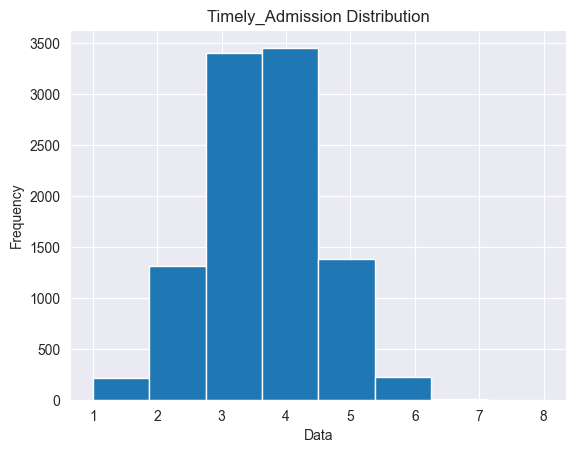

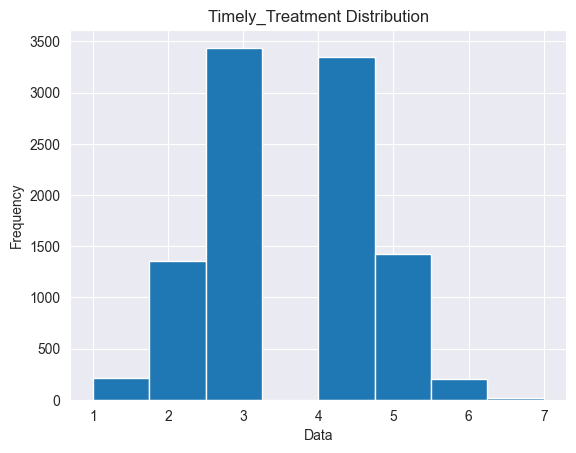

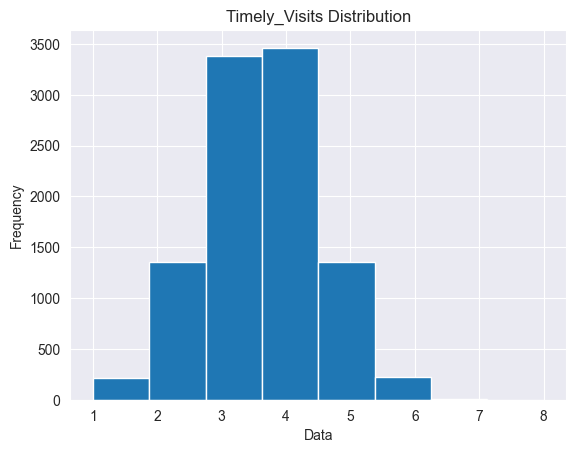

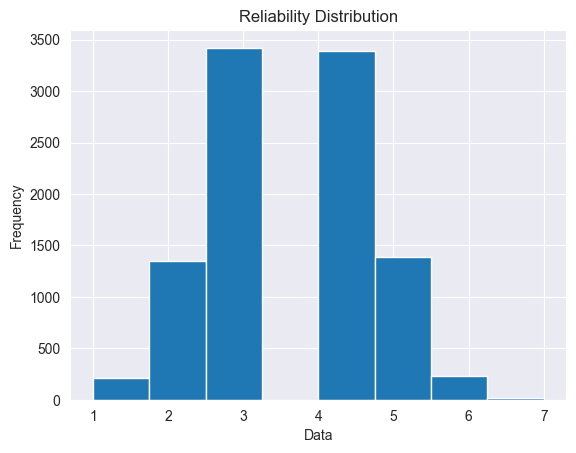

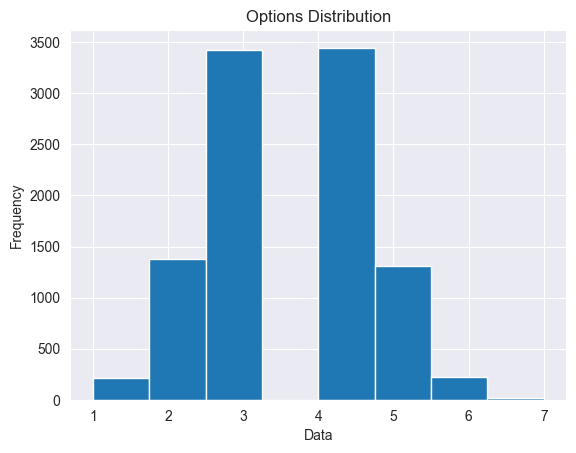

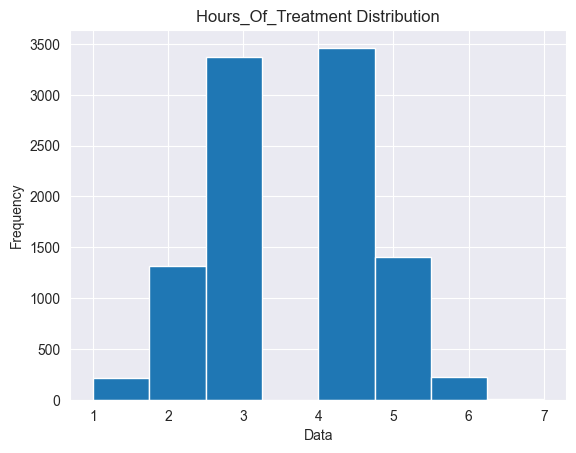

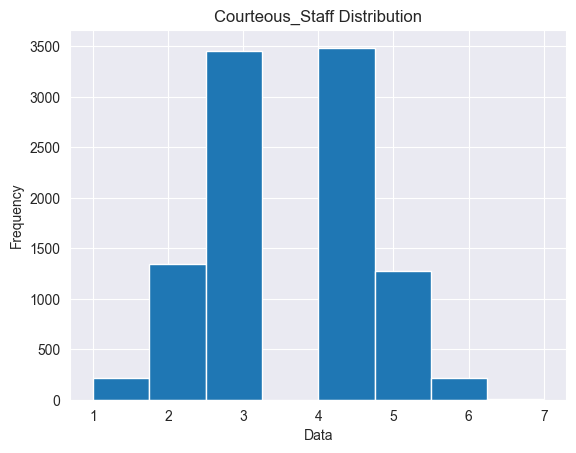

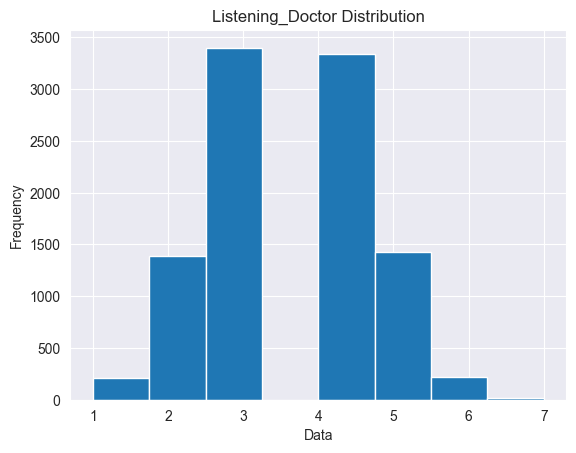

In [6]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

warnings.filterwarnings('ignore')

medical_data = pd.read_csv('./medical_clean.csv')

survey_data = medical_data[['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']]

'''
Linear Numeric Scale re-mapping.

The collection of the current survey data seems to be counter to the traditional means of the greater the number
the more positive or significant the meaning.
'''

survey_data_premapping = survey_data.copy(deep=True)

linear_numerical_scale_remapping = {
     1:8
    ,2:7
    ,3:6
    ,4:5
    ,5:4
    ,6:3
    ,7:2
    ,8:1
}
for i in range(1, 9):
    survey_data[f'Item{i}'].map(linear_numerical_scale_remapping)

#TODO: double check the re-mapped values against the pre-mapped

column_renames = {
     'Item1': 'Timely_Admission'
    ,'Item2': 'Timely_Treatment'
    ,'Item3': 'Timely_Visits'
    ,'Item4': 'Reliability'
    ,'Item5': 'Options'
    ,'Item6': 'Hours_Of_Treatment'
    ,'Item7': 'Courteous_Staff'
    ,'Item8': 'Listening_Doctor' #Evidence of active listening from Doctor
}

survey_data.rename(columns=column_renames, inplace=True)

print(survey_data.info())

'''
Exploratory items:
  * Double-checking the distributions of the data
'''
number_of_bins = 8
survey_data_columns = survey_data.columns.tolist()
for column in survey_data_columns:
    plt.hist(survey_data[column], bins=number_of_bins)
    plt.xlabel('Data')
    plt.ylabel('Frequency')
    plt.title(f'{column} Distribution')
    plt.show()

<a id="copy-of-dataset"></a>
# C4: Copy of Prepared Data Set

In [7]:
survey_data.to_csv('./wgu-patient_survey_data.csv', index=False)

<a id="analysis-description"></a>
# D1: Analysis Description

The `WGU Medical Dataset Patient Survey Data` has been subjected to an analysis utilizing `hierarchical clustering`. A known caveat with `hierarchical clustering` is its sensitivity to dataset size. This sensitivity can be further exacerbated depending on the choice of [`linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) function method parameter.

A crucial factor influencing this analysis is the computational power of the hardware. To be precise, the capacity to cluster and visually represent the data was constrained by the available hardware resources. This presents a unique form of hardware-induced bias: if a potentially superior method demands computational resources beyond what's available, it remains inaccessible for the analysis, thereby influencing outcomes. This scenario underscores a fascinating instance of computational bias, contrasting with the more commonly discussed human biases.

To illustrate, my work spanned multiple platforms, sometimes transitioning between a Windows machine and a macOS machine. My Windows setup lacks a dedicated GPU, a component that typically boosts specific scientific computations. Conversely, when running the same code on my MacBook Air M2, it benefits from a proprietary "M2 chip featuring a dedicated 16-core Neural Engine for neural network computations" (Apple M2, 2023).

Given the significant disparity in capabilities for dendrogram generation between the two machines, it is imperative to ground the analysis on the lowest common computational benchmark or the minimum requisite for the task. As the Windows laptop, devoid of a dedicated GPU or specialized Neural Network Cores, represents this baseline, it was selected to set the computational standard for this analysis.

Out of the available [`linkage()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) methods, where every method successfully provedided a distance matrix, a handful gave the [`dendrogram()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram) function a hard time with it's clustering and diagram rendering processing depending on the hardware.

Dendrogram failed for hardware without GPU/Neural Network with distance matricies from the following method modes:
 * 'single'-based on two closest objects


<a id="classification-analaysis-code"></a>
# D2: Classification Analysis Code

In [8]:
'''
Function: linkage(...)
Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
Description:
  The linkage function is going to be used to create a distance matrix needed to perform hierarchical clustering and associated dendrogram.

  Method Options:
  * single - based on two closest objects
  * complete - based on two farthest objects
  * average - based on arithmetic mean of all objects
  * centroid - based on geometric mean of all objects
  * median - based on the median of all objects
  * ward - based on sum of squares
'''

survey_distance_matrix = linkage(survey_data, method='complete', metric='euclidean', optimal_ordering=False)

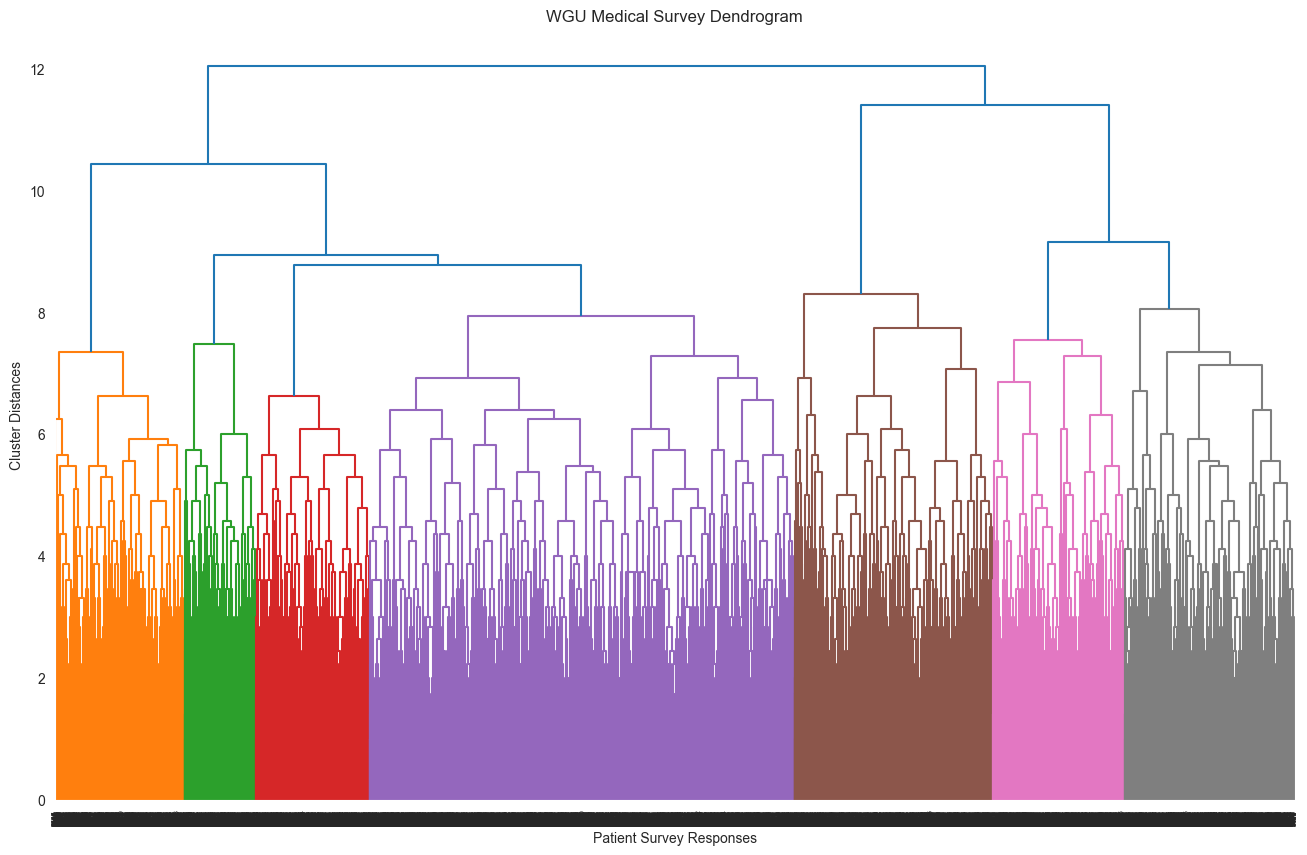

In [9]:
'''
Cluster Visualization: Dendrogram
Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
'''

plt.figure(figsize=(16, 10))
plt.title('WGU Medical Survey Dendrogram')
plt.xlabel('Patient Survey Responses')
plt.ylabel('Cluster Distances')
dendrogram_structures = dendrogram(survey_distance_matrix)
plt.show()

In [10]:
'''
Function: fcluster(...)
Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html
Description:
    The fcluster function is going to be used to create the labels for the distance matrix.
'''

survey_data['labels'] = fcluster(survey_distance_matrix, 2, criterion='maxclust')

<a id="model-accuracy"></a>
# E1: Accuracy of Clustering Model

<a id="model-results"></a>
# E2: Model Results

<a id="model-limitations"></a>
# E3: Model Limitations

<a id="recommended-action"></a>
# E4: Recommended Action

<a id="anopto-recording"></a>
# F: Panopto Recording

<a id="panopto-recording"></a>
# G: Code References

<a id="source-reference"></a>
# H: Source References

 * Bruce, P., Bruce, A., &amp; Gedeck, P. (2020). Practical statistics for data scientists: 50+ essential concepts using r and python. O’Reilly Media. <br /><br />
 * Keita, Z. (2023, January 19). An introduction to hierarchical clustering in Python. DataCamp. [https://www.datacamp.com/tutorial/introduction-hierarchical-clustering-python](https://www.datacamp.com/tutorial/introduction-hierarchical-clustering-python) <br /><br />
 * Jeff Sauro, P. (2018, August 15). 15 common rating scales explained. MeasuringU. [https://measuringu.com/rating-scales/](https://measuringu.com/rating-scales/) <br /><br />
 * Wikimedia Foundation. (2023, July 4). Apple M2. Wikipedia. https://en.wikipedia.org/wiki/Apple_M2 <br /><br />